In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from helpers import *


In [2]:
# reading in data from the first protein
protein_name = 'O43526'
protein = pd.read_csv(f"data/AF-{protein_name}-F1-model_v3.tsv", sep='\t')
protein


,index,x,y,z,gamma,exp,obs
0,1,-3.512,-33.674,-14.723,0.766105,0.551831,0
1,2,-1.390,-34.119,-11.579,0.286887,0.548329,0
2,3,1.629,-36.312,-11.147,0.535520,0.621959,2
3,4,4.865,-35.872,-9.157,0.688981,0.579143,1
4,5,7.371,-38.625,-8.349,0.442748,0.575410,0
...,...,...,...,...,...,...,...
867,868,-12.577,-52.381,-22.296,0.353039,0.586997,0
868,869,-10.479,-51.784,-19.900,0.380064,0.597300,0
869,870,-6.981,-50.668,-18.703,0.392629,0.529663,0
870,871,-3.920,-51.828,-16.712,0.431890,0.630496,0


In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

N = len(protein)
ONE = np.ones((N, 1))
IOTA = np.array(range(N))

dist_matrix = diff_matrix(protein.x)**2 \
    + diff_matrix(protein.y)**2 \
    + diff_matrix(protein.z)**2


dist_matrix

order = np.argsort(dist_matrix, axis=1)

cumulative_obs = protein.obs.values[order].cumsum(axis=1)
cumulative_exp = protein.exp.values[order].cumsum(axis=1)
total_obs = protein.obs.sum()
total_exp = protein.exp.sum()
K = total_obs / total_exp

a = cumulative_obs/cumulative_exp
b = cumulative_obs.cumsum(axis=1) / cumulative_exp.cumsum(axis=1)

# print(cumulative_obs/cumulative_exp)



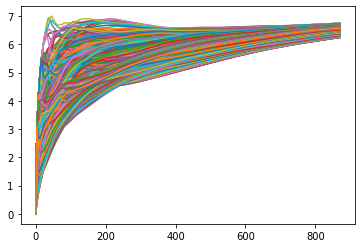

In [4]:

plt.rcParams['figure.figsize'] = [20, 10]
for i in IOTA:
    # plt.plot(IOTA, np.log(1+IOTA)/(K + a[i]))
    # plt.plot(IOTA, np.log(1+np.log(1+IOTA))/(K+a[i]))
    plt.plot(IOTA, np.log(1+IOTA)/(K+b[i]))
    # plt.plot(IOTA, a[i])
    # plt.plot(IOTA, np.log(1+np.log(1+IOTA))/(K+b[i]))

plt.show()

In [5]:
from sklearn.preprocessing import MinMaxScaler

scores = ((np.log(1+ONE@vectorise(IOTA).T))/(K+b)).mean(axis=1)
save_colouring(scores, f'data/{protein_name}_scores.tsv')

# mms = MinMaxScaler()
# a = ((np.log(1+ONE@vectorise(IOTA).T))/(K+b)).mean(axis=1)
# a
# scores = mms.fit_transform(vectorise(a)).reshape((-1))
# # pd.DataFrame([IOTA, scores]).to_csv('data/P06576_scores.tsv', sep='\t')
# df = pd.DataFrame()
# df['index'] = IOTA+1
# df['score'] = [int(i*100) for i in scores]
# df.to_csv(f'data/{protein_name}_scores.tsv', sep='\t', header=False, index=False)

In [6]:
b

array([[0.        , 0.        , 0.59274913, ..., 0.51082284, 0.51084528,
        0.51086643],
       [0.        , 1.16372647, 1.16254218, ..., 0.51369019, 0.51370606,
        0.51372066],
       [3.21564694, 2.23183561, 1.97646472, ..., 0.51481047, 0.51482377,
        0.51483581],
       ...,
       [0.        , 0.        , 0.        , ..., 0.5098593 , 0.50988395,
        0.5099073 ],
       [0.        , 0.        , 0.        , ..., 0.51094474, 0.51096691,
        0.51098778],
       [0.        , 0.        , 0.        , ..., 0.51089895, 0.51092122,
        0.5109422 ]])